# Day 08. Exercise 04
# Regression

## 0. Imports

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## 1. Preprocessing

1. Прочтите файл [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Заполните пропущенные значения в файле числом `0`.
3. Разделите набор данных на обучающую и тестовую выборки с параметрами `test_size=0,2`.

In [90]:
df = pd.read_csv('../data/checker_regression.csv')
df = df.fillna(0)
df = df.groupby(['uid']).first()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, user_1 to user_8
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num_commits  29 non-null     int64  
 1   pageviews    29 non-null     float64
 2   AVG(diff)    29 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 928.0+ bytes


In [91]:
x = df[['num_commits', 'pageviews']]
y = df['AVG(diff)']

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

## 2. Crossvalidation

1. Напишите функцию `crossval`, которая принимает в качестве аргументов: `n_splits` для `KFold()`, `X`, `y`, экземпляр класса модели с параметрами модели (не забывайте: `random_state=21`) и возвращает для заданного класса модели такой результат: 

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Запустите функцию для `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Вы можете выбрать параметры самостоятельно, но убедитесь, что они вам подходят.

In [93]:
def crossval(n_splits, x, y, model):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    train_scores = []
    test_scores = []
    
    for train_idx, test_idx in kf.split(x):
        x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        model.fit(x_train, y_train)
        
        train_pred = model.predict(x_train)
        test_pred = model.predict(x_test)
        
        train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
        
        train_scores.append(train_rmse)
        test_scores.append(test_rmse)
        
        print(f"train -  {train_rmse}   |   test -  {test_rmse}")
    
    avg_test_rmse = np.mean(test_scores)
    print(f"Average RMSE on crossval is {avg_test_rmse}")
    
    return train_scores, test_scores, avg_test_rmse

LinearRegression

In [94]:
linreg = LinearRegression()
train_errors, test_errors, avg_error = crossval(10, x, y, linreg)

train -  61.35327112662008   |   test -  57.85614740884658
train -  62.5462335194863   |   test -  44.71218893425673
train -  61.14556371253599   |   test -  83.19897138394583
train -  58.416728626194235   |   test -  79.399015977114
train -  60.11026827841826   |   test -  68.75614618929599
train -  60.619323028395335   |   test -  65.92296908962915
train -  61.72075104991356   |   test -  61.800360553015715
train -  62.606806828366416   |   test -  46.689942929927824
train -  55.58034321272078   |   test -  99.08124434288634
train -  61.57793245106181   |   test -  53.24118830442656
Average RMSE on crossval is 66.06581751133447


DecisionTreeRegressor

In [95]:
dt = DecisionTreeRegressor(random_state=21, max_depth=5)
train_errors, test_errors, avg_error = crossval(10, x, y, dt)

train -  19.51853504928291   |   test -  120.62116123233534
train -  13.810879405644846   |   test -  79.5333147061541
train -  24.668873948365416   |   test -  0.0
train -  24.61110834249758   |   test -  78.98656472722058
train -  7.999221716949911   |   test -  96.70180443756715
train -  15.988261168504463   |   test -  53.91636704579294
train -  24.668873948365416   |   test -  0.0
train -  20.545808925984808   |   test -  56.383024650598514
train -  23.16474904441225   |   test -  114.38661254547942
train -  22.13969671838106   |   test -  40.58792924010783
Average RMSE on crossval is 64.1116778585256


RandomForestRegressor

In [96]:
rf = RandomForestRegressor(random_state=21, n_estimators=100, max_depth=5)
train_errors, test_errors, avg_error = crossval(10, x, y, rf)

train -  23.555450035938815   |   test -  96.19586997898315
train -  23.37616938867965   |   test -  77.10136030161769
train -  29.01892404506386   |   test -  19.88247969630333
train -  27.08460832675475   |   test -  55.514349432519126
train -  23.494043923643225   |   test -  75.21939886781315
train -  25.33414551590184   |   test -  58.969127664608244
train -  28.402826004359785   |   test -  8.13449550357532
train -  26.04758895996093   |   test -  57.899026321293555
train -  23.81091789778693   |   test -  92.71225756735612
train -  28.79496018011264   |   test -  31.94744547826639
Average RMSE on crossval is 57.35758108123362


## 3. Predictions and evaluation

1. Сделайте прогнозы для тестового набора данных, используя каждую из трёх моделей с окончательными параметрами.
2. Постройте график для каждой из моделей, где по оси `x` отложена фактическая средняя разница, а по оси `y` — прогноз, сделанный моделью.
3. Как бы выглядел график в идеальном случае? Вставьте ответ в ячейку с разметкой в конце раздела.

## Прогнозы для тестового набора данных

In [97]:
linreg = LinearRegression()
dt = DecisionTreeRegressor(random_state=21, max_depth=5)
rf = RandomForestRegressor(random_state=21, n_estimators=100, max_depth=5)

y_pred_lr = linreg.fit(x_train, y_train).predict(x_test)
y_pred_dt = dt.fit(x_train, y_train).predict(x_test)
y_pred_rf = rf.fit(x_train, y_train).predict(x_test)

In [98]:
def predictions_plot(true_values, pred_values, model_title):
    plt.figure(figsize=(15, 10))
    
    plt.scatter(true_values, pred_values, alpha=0.5, color="#299df0", label='Предсказания модели')

    min_val = min(true_values.min(), pred_values.min())
    max_val = max(true_values.max(), pred_values.max())
    plt.plot([min_val, max_val], [min_val, max_val], color="#f50f8e", linestyle='--', linewidth=2, label='Идеальные предсказания')

    plt.xlabel('Фактическая средняя разница (true_values)')
    plt.ylabel('Прогноз, сделанный моделью (pred_values)')
    plt.title(f'{model_title}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

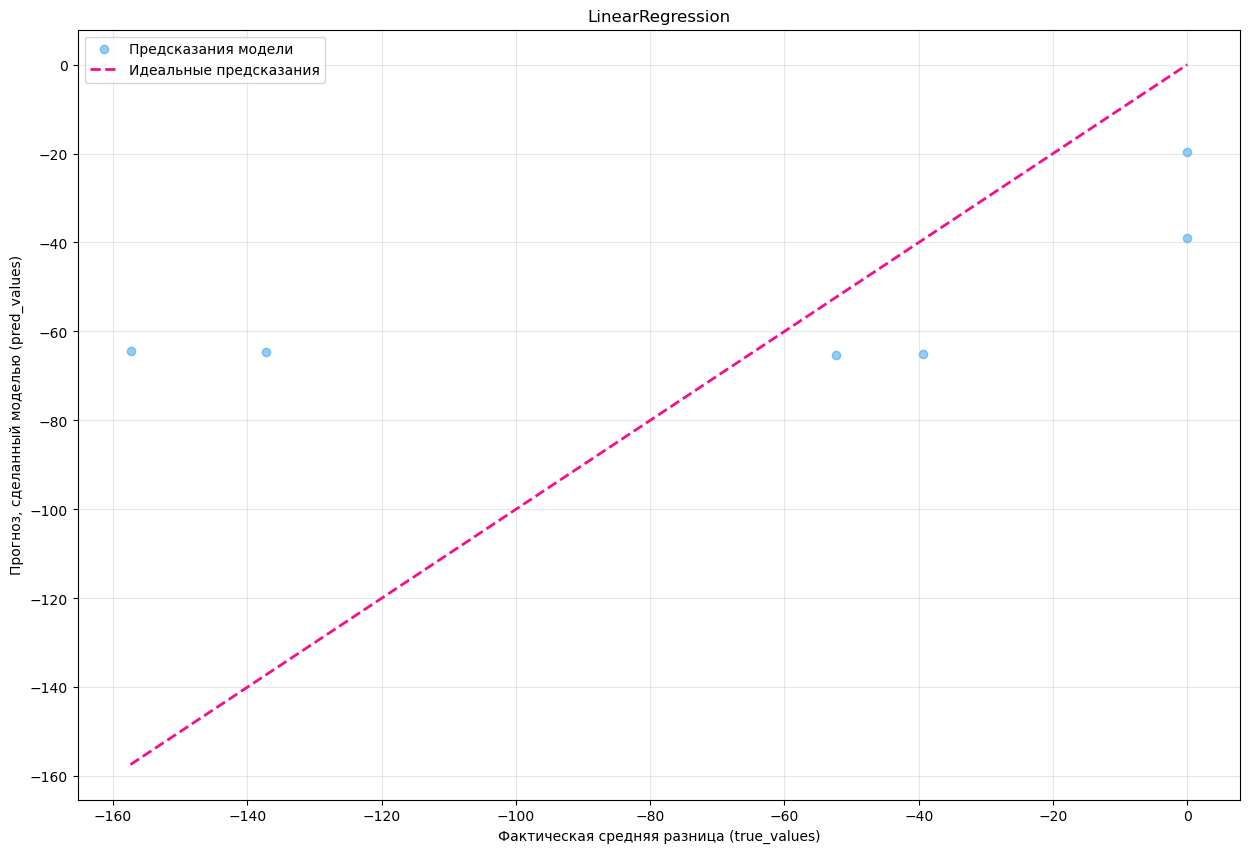

In [99]:
predictions_plot(y_test, y_pred_lr, 'LinearRegression')

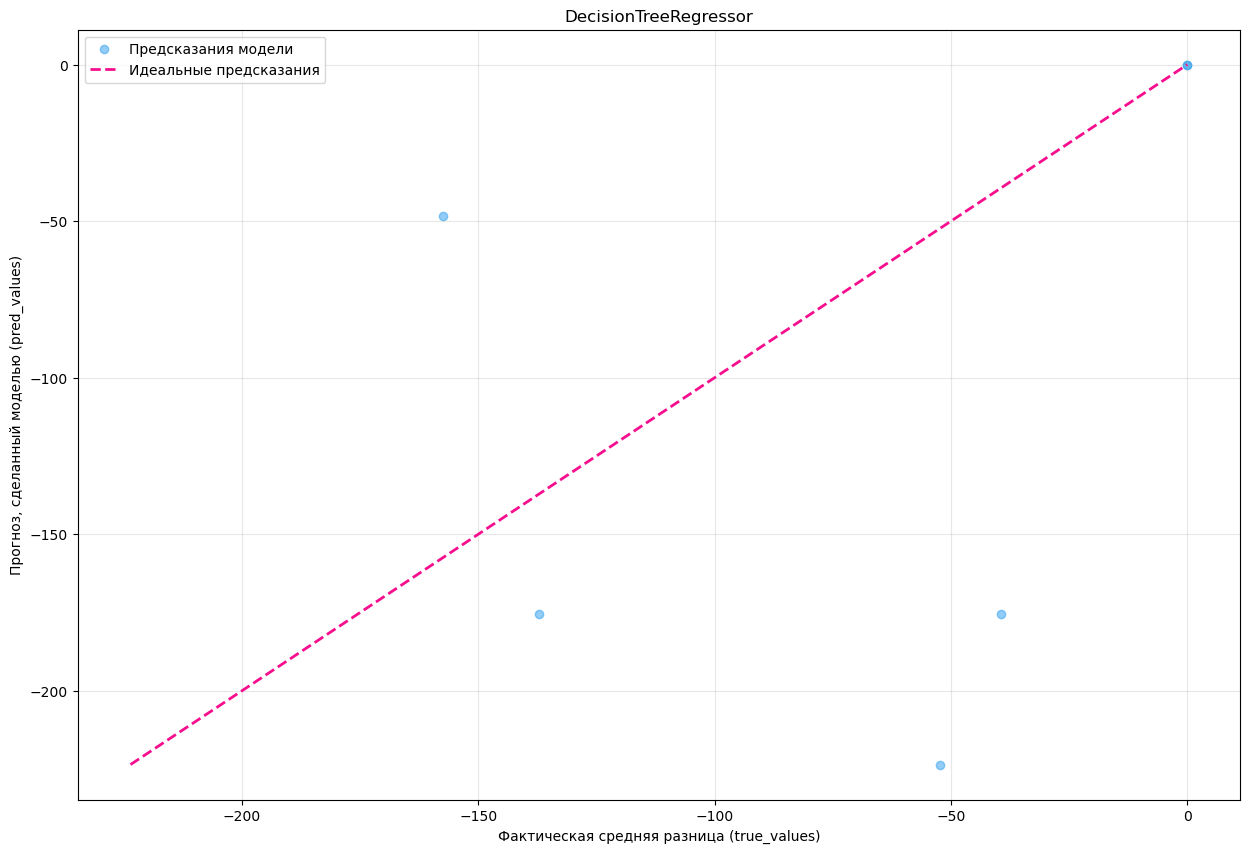

In [100]:
predictions_plot(y_test, y_pred_dt, 'DecisionTreeRegressor')

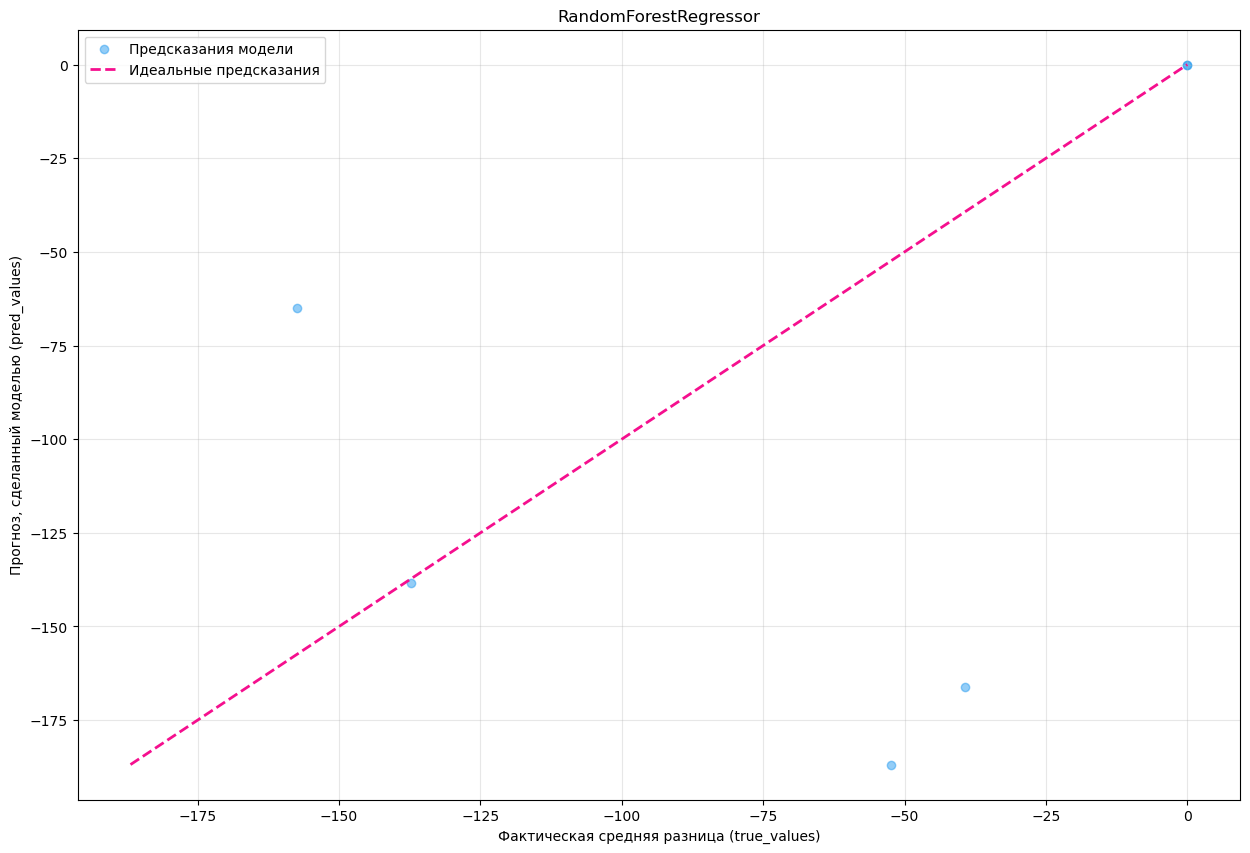

In [101]:
predictions_plot(y_test, y_pred_rf, 'RandomForestRegressor')

## Ответ: В идеальном случае график представлял бы собой диагональ (где true_values == pred_values)